In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [61]:
df.shape

(125973, 44)

In [4]:
df['srcbytes'].describe()

,srcbytes
count,1.259730e+05
mean,4.556674e+04
std,5.870331e+06
min,0.000000e+00
25%,0.000000e+00
50%,4.400000e+01
75%,2.760000e+02
max,1.379964e+09


In [5]:
df[df['srcbytes'] == 0]['is_attack'].value_counts()

,count
is_attack,
attack,45977
normal,3415


(0.0, 1000.0)

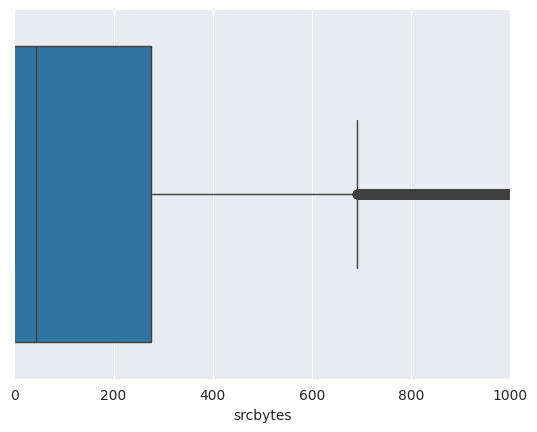

In [42]:
sns.boxplot(data=df,x='srcbytes')
plt.xlim(0,1000)

<Axes: xlabel='srcbytes', ylabel='Density'>

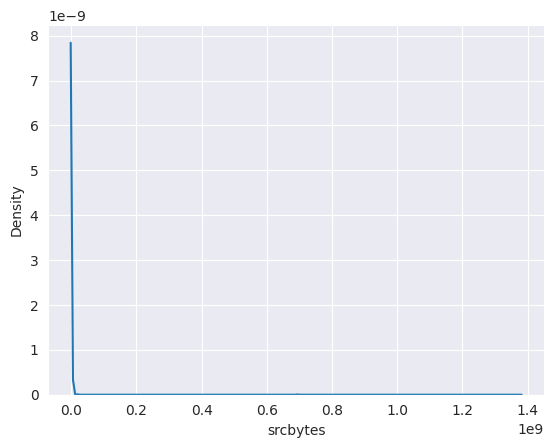

In [8]:
sns.kdeplot(data=df,x='srcbytes')

In [16]:
np.percentile(df['srcbytes'],75),np.percentile(df['srcbytes'],50),np.percentile(df['srcbytes'],25)

(276.0, 44.0, 0.0)

In [32]:
np.mean(df['srcbytes']),np.std(df['srcbytes'])

(45566.74300048423, 5870307.881887237)

In [44]:
IQR = np.percentile(df['srcbytes'],75)-np.percentile(df['srcbytes'],25)
ulimit = np.percentile(df['srcbytes'],75) + 1.5*IQR
ulimit

690.0

In [48]:
not_outlier = df[df['srcbytes'] <= ulimit].shape[0]
is_outlier = df[df['srcbytes'] > ulimit].shape[0]
total_data = df.shape[0]
not_outlier,is_outlier,(not_outlier/total_data)*100, (is_outlier/total_data)*100

(112133, 13840, 89.01351876989514, 10.986481230104864)

In [34]:
df[df['srcbytes'] == 0].shape[0],df[df['srcbytes'] > 0].shape[0]

(49392, 76581)

In [60]:
max(df['srcbytes'])

1379963888

(0.0, 1000.0)

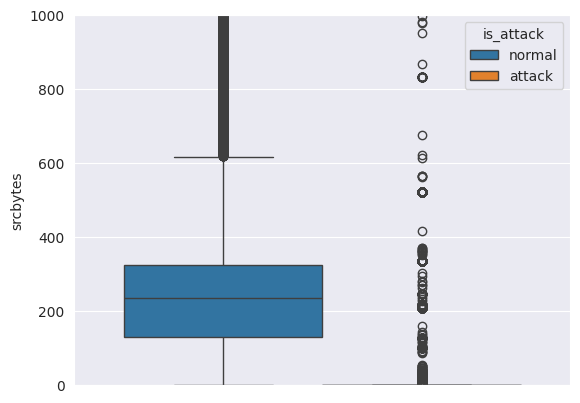

In [31]:
sns.boxplot(data=df,y='srcbytes',hue='is_attack')
plt.ylim(0,1000)

In [37]:
tmp = df[['srcbytes','is_attack','duration']].copy()
tmp['has_srcbytes'] = tmp['srcbytes'].apply(lambda x : 'No' if x == 0 else 'Yes')
pd.pivot_table(data=tmp,index='has_srcbytes',columns='is_attack',values='duration',aggfunc='count',margins=True)

is_attack,attack,normal,All
has_srcbytes,,,
No,45977,3415,49392
Yes,12653,63928,76581
All,58630,67343,125973


In [50]:
pd.DataFrame(df['dstbytes'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dstbytes,125973.0,19779.114421,4.021269e+06,0.0,0.0,0.0,516.0,1.309937e+09


In [52]:
np.percentile(df['dstbytes'],75),np.percentile(df['dstbytes'],50),np.percentile(df['dstbytes'],25)

(516.0, 0.0, 0.0)

In [53]:
np.mean(df['dstbytes']),np.std(df['dstbytes'])

(19779.114421344257, 4021253.1905705244)

In [59]:
max(df['dstbytes'])

1309937401

In [54]:
IQR = np.percentile(df['dstbytes'],75)-np.percentile(df['dstbytes'],25)
ulimit = np.percentile(df['dstbytes'],75) + 1.5*IQR
ulimit

1290.0

In [55]:
not_outlier = df[df['dstbytes'] <= ulimit].shape[0]
is_outlier = df[df['dstbytes'] > ulimit].shape[0]
total_data = df.shape[0]
not_outlier,is_outlier,(not_outlier/total_data)*100, (is_outlier/total_data)*100

(102394, 23579, 81.28249704301716, 18.717502956982845)

<Axes: xlabel='dstbytes', ylabel='Density'>

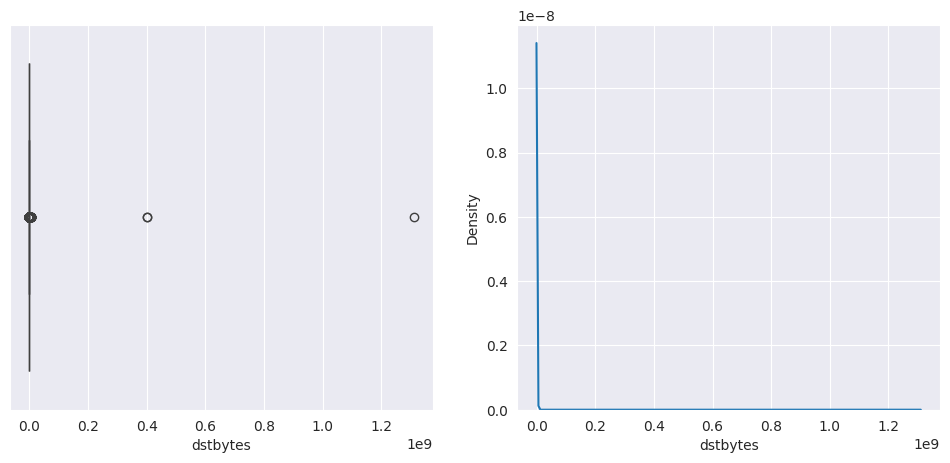

In [51]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dstbytes')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='dstbytes')

In [57]:
dbytes = df[df['srcbytes'] != df['dstbytes']]
dbytes['is_attack'].value_counts()

,count
is_attack,
normal,61885
attack,12726


In [58]:
sbytes = df[df['srcbytes'] == df['dstbytes']]
sbytes['is_attack'].value_counts()

,count
is_attack,
attack,45904
normal,5458


In [71]:
tdf = df.copy()
tdf['src_outlier'] = tdf['srcbytes'].apply(lambda x: 1 if x>690 else 0)
tdf['dst_outlier'] = tdf['dstbytes'].apply(lambda x: 1 if x>1290 else 0)
tdf.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack,src_outlier,dst_outlier
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,0,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,0,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack,0,0
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,0,1
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0,0


In [73]:
tdf[tdf['src_outlier'] == 1]['dst_outlier'].value_counts()

,count
dst_outlier,
0,11507
1,2333


In [74]:
tdf[tdf['src_outlier'] == 0]['dst_outlier'].value_counts()

,count
dst_outlier,
0,90887
1,21246


In [75]:
tdf[tdf['dst_outlier'] == 1]['src_outlier'].value_counts()

,count
src_outlier,
0,21246
1,2333


In [76]:
tdf[tdf['dst_outlier'] == 0]['src_outlier'].value_counts()

,count
src_outlier,
0,90887
1,11507


In [78]:
df[['srcbytes','dstbytes']].corr()

,srcbytes,dstbytes
srcbytes,1.000000,0.000204
dstbytes,0.000204,1.000000


In [64]:
df['wrongfragment'].value_counts()

,count
wrongfragment,
0,124883
3,884
1,206


In [66]:
pd.pivot_table(data=df,index='wrongfragment',columns='is_attack',values='duration',aggfunc='count',fill_value=0)

is_attack,attack,normal
wrongfragment,,
0,57540,67343
1,206,0
3,884,0


In [68]:
pd.pivot_table(data=df,index='attack',columns='wrongfragment',values='duration',aggfunc='count',fill_value=0)

wrongfragment,0,1,3
attack,,,
back,956,0,0
buffer_overflow,30,0,0
ftp_write,8,0,0
guess_passwd,53,0,0
imap,11,0,0
ipsweep,3599,0,0
land,18,0,0
loadmodule,9,0,0
multihop,7,0,0


In [89]:
df[df['land'] == 1].shape

(25, 44)

In [90]:
df[df['land'] == 1]['is_attack'].value_counts()

,count
is_attack,
attack,18
normal,7


In [80]:
df['urgent'].value_counts()

,count
urgent,
0,125964
1,5
2,3
3,1


In [86]:
df[df['urgent'] > 0]['protocoltype'].value_counts()

,count
protocoltype,
tcp,9


In [87]:
df[df['urgent'] > 0]['is_attack'].value_counts()

,count
is_attack,
normal,6
attack,3


In [92]:
pd.DataFrame(df['duration'].describe()).T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.14465,2604.51531,0.0,0.0,0.0,0.0,42908.0


In [94]:
np.percentile(df['duration'],25),np.percentile(df['duration'],50),np.percentile(df['duration'],75)

(0.0, 0.0, 0.0)

In [100]:
np.percentile(df['duration'],93)

1.0

In [95]:
IQR = np.percentile(df['duration'],75)-np.percentile(df['duration'],25)
ulimit = np.percentile(df['duration'],75) + 1.5*IQR
ulimit

0.0

In [96]:
not_outlier = df[df['duration'] <= ulimit].shape[0]
is_outlier = df[df['duration'] > ulimit].shape[0]
total_data = df.shape[0]
not_outlier,is_outlier,(not_outlier/total_data)*100, (is_outlier/total_data)*100

(115955, 10018, 92.04750224254403, 7.952497757455963)

<Axes: xlabel='duration', ylabel='Density'>

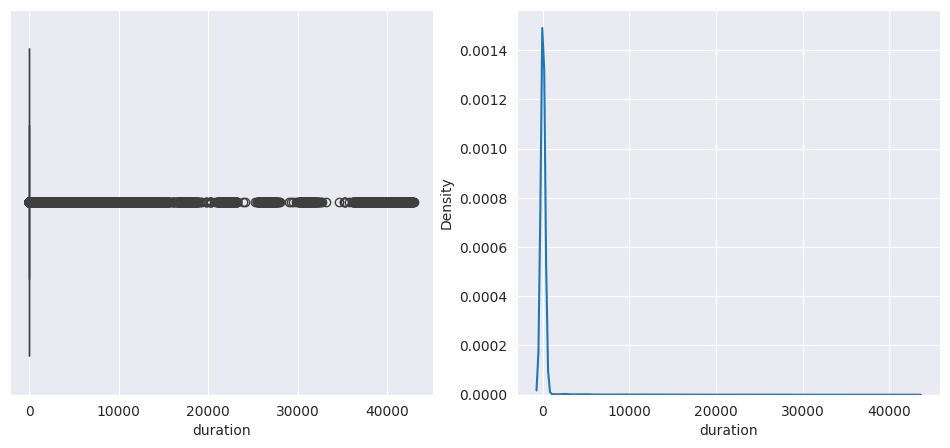

In [97]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='duration')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='duration')

In [103]:
df[df['duration'] > 0]['protocoltype'].value_counts()

,count
protocoltype,
tcp,8053
udp,1965


In [101]:
df[df['duration'] > 0]['flag'].value_counts()

,count
flag,
SF,8247
RSTR,1465
RSTOS0,103
RSTO,93
REJ,63
S2,28
S3,19


In [ ]:
df[df['duration'] > 0]['flag']

In [102]:
df[df['duration'] > 0]['flag'].value_counts().sum()

10018

In [104]:
ddf = df.copy()
ddf['is_duration'] = ddf['duration'].apply(lambda x: 1 if x > 0 else 0)
ddf.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack,is_duration
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack,0
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0


In [105]:
pd.pivot_table(data=ddf,index='is_duration',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
is_duration,,
0,56569,59386
1,2061,7957


In [113]:
pd.pivot_table(data=ddf,index='is_duration',columns='flag',values='duration',aggfunc='count')

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
is_duration,,,,,,,,,,,
0,46.0,11170.0,1469.0,NaN,956.0,34851.0,365.0,99.0,30.0,66698.0,271.0
1,NaN,63.0,93.0,103.0,1465.0,NaN,NaN,28.0,19.0,8247.0,NaN
